In [ ]:
import pandas as pd
df = pd.read_excel ('sales_2010.xlsx')
df.head()

區域         日期          時間  \
0  北區                                            ... 2010-01-01  10:54:30:0   
1  北區                                            ... 2010-01-01  11:30:43:8   
2  北區                                            ... 2010-01-01  14:29:41:4   
3  北區                                            ... 2010-01-01  15:54:19:8   
4  北區                                            ... 2010-01-01  16:57:47:6   

                                                商品類別      ID  銷售量  
0  電瓶                                            ...   24614    1  
1  雨刷                                            ...  223233    1  
2  雨刷                                            ...  265352    1  
3  電瓶                                            ...   24629    1  
4  雨刷                                            ...  257184    1

## Removing unnecesarry space in data

In [ ]:
df['區域']=df['區域'].str.strip()
df['商品類別']=df['商品類別'].str.strip()
df.head()

區域         日期          時間 商品類別      ID  銷售量
0  北區 2010-01-01  10:54:30:0   電瓶   24614    1
1  北區 2010-01-01  11:30:43:8   雨刷  223233    1
2  北區 2010-01-01  14:29:41:4   雨刷  265352    1
3  北區 2010-01-01  15:54:19:8   電瓶   24629    1
4  北區 2010-01-01  16:57:47:6   雨刷  257184    1

## Separating wiper and battery
focus on 北歐

In [ ]:
df_wiper=df[df['商品類別']=='雨刷']
df_wiper=df_wiper[df_wiper['區域']=='北區']
df_wiper

區域         日期          時間 商品類別      ID  銷售量
1      北區 2010-01-01  11:30:43:8   雨刷  223233    1
2      北區 2010-01-01  14:29:41:4   雨刷  265352    1
4      北區 2010-01-01  16:57:47:6   雨刷  257184    1
5      北區 2010-01-01  16:57:47:6   雨刷  257187    1
7      北區 2010-01-01  21:53:45:5   雨刷  257188    1
...    ..        ...         ...  ...     ...  ...
85435  北區 2010-12-31  16:02:37:4   雨刷  282884    2
85436  北區 2010-12-31  16:52:25:0   雨刷   40581    1
85437  北區 2010-12-31  17:21:17:0   雨刷  284330    1
85439  北區 2010-12-31  19:28:15:9   雨刷  285105    1
85440  北區 2010-12-31  19:53:33:9   雨刷  284335    1

[54552 rows x 6 columns]

In [ ]:
df_batt=df[df['商品類別']=='電瓶']
df_batt=df_batt[df_batt['區域']=='北區']
df_batt

區域         日期          時間 商品類別      ID  銷售量
0      北區 2010-01-01  10:54:30:0   電瓶   24614    1
3      北區 2010-01-01  15:54:19:8   電瓶   24629    1
6      北區 2010-01-01  18:22:40:5   電瓶  226350    1
23     北區 2010-01-01  11:32:32:8   電瓶   24616    1
24     北區 2010-01-01  12:29:24:0   電瓶  149698    1
...    ..        ...         ...  ...     ...  ...
85424  北區 2010-12-30  14:59:47:9   電瓶   24616    1
85425  北區 2010-12-30  16:14:10:6   電瓶  222754    1
85430  北區 2010-12-31  14:38:12:3   電瓶  222752    1
85431  北區 2010-12-31  14:38:12:3   電瓶  222755    1
85438  北區 2010-12-31  18:04:39:2   電瓶   24638    1

[4456 rows x 6 columns]

## Check Data

In [ ]:
def screen_data(df):
    print('-'*40)
    print('list of Columns : ',df.columns.to_list())
    print('-'*40)
    print('Missing Values in the columns : \n')
    print(df.isnull().sum())
    print('-'*40)
    print('Unique Value Counts : \n')
    print(df.nunique())
    print('-'*40)


In [ ]:
screen_data(df_wiper)
screen_data(df_batt)

----------------------------------------
list of Columns :  ['區域', '日期', '時間', '商品類別', 'ID', '銷售量']
----------------------------------------
Missing Values in the columns : 

區域      0
日期      0
時間      0
商品類別    0
ID      0
銷售量     0
dtype: int64
----------------------------------------
Unique Value Counts : 

區域          1
日期        365
時間      30116
商品類別        1
ID        362
銷售量        38
dtype: int64
----------------------------------------
----------------------------------------
list of Columns :  ['區域', '日期', '時間', '商品類別', 'ID', '銷售量']
----------------------------------------
Missing Values in the columns : 

區域      0
日期      0
時間      0
商品類別    0
ID      0
銷售量     0
dtype: int64
----------------------------------------
Unique Value Counts : 

區域         1
日期       365
時間      4341
商品類別       1
ID        57
銷售量        4
dtype: int64
----------------------------------------


Both data has 365 unique days so there is always at least 1 purchase every day 

## Group data by days and count

In [ ]:
wiper=df_wiper.groupby(['日期'])['銷售量'].sum().reset_index()
wiper

日期  銷售量
0   2010-01-01  156
1   2010-01-02  288
2   2010-01-03  244
3   2010-01-04   98
4   2010-01-05  156
..         ...  ...
360 2010-12-27  155
361 2010-12-28  144
362 2010-12-29  106
363 2010-12-30   98
364 2010-12-31  125

[365 rows x 2 columns]

In [ ]:
batt=df_batt.groupby(['日期'])['銷售量'].sum().reset_index()
batt

日期  銷售量
0   2010-01-01   12
1   2010-01-02   10
2   2010-01-03   12
3   2010-01-04   21
4   2010-01-05   10
..         ...  ...
360 2010-12-27   15
361 2010-12-28   10
362 2010-12-29    7
363 2010-12-30    8
364 2010-12-31   24

[365 rows x 2 columns]

365 data (OK!)

## See the sales number per date

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

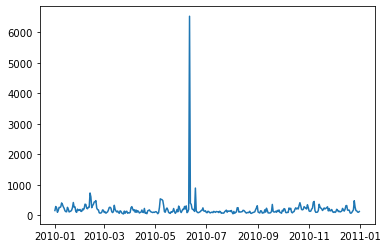

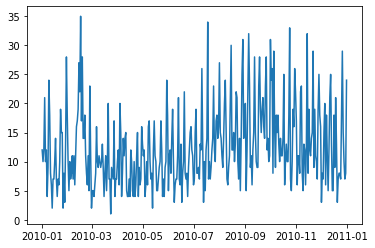

In [ ]:
plt.figure(1)
ax1=plt.plot(wiper['日期'],wiper['銷售量'],label='Sales')
plt.figure(2)
ax2=plt.plot(batt['日期'],batt['銷售量'],label='Sales')

There is a sharp increase in june for wiper

In [ ]:
wiper.sort_values(by=['銷售量'],ascending=False)

日期   銷售量
161 2010-06-11  6529
168 2010-06-18   893
42  2010-02-12   731
43  2010-02-13   602
126 2010-05-07   540
..         ...   ...
81  2010-03-23    56
110 2010-04-21    53
123 2010-05-04    52
213 2010-08-02    50
82  2010-03-24    45

[365 rows x 2 columns]

In [ ]:
df[(df['日期']=='2010-06-11') & (df['商品類別']=='雨刷')].sort_values(by=['銷售量'],ascending=False)

區域         日期          時間 商品類別      ID   銷售量
21694  北區 2010-06-11  14:12:21:3   雨刷  269492  3029
37655  北區 2010-06-11  14:12:21:3   雨刷  269490  2433
40788  北區 2010-06-11  14:12:21:3   雨刷  269494   284
40786  北區 2010-06-11  14:12:21:3   雨刷  269488   165
39417  北區 2010-06-11  14:12:21:3   雨刷  269496   120
...    ..        ...         ...  ...     ...   ...
32143  北區 2010-06-11  13:47:12:0   雨刷  282223     1
32142  北區 2010-06-11  12:26:45:1   雨刷  265357     1
32141  北區 2010-06-11  12:26:45:1   雨刷  265354     1
32140  北區 2010-06-11  12:22:48:1   雨刷  213539     1
96217  南區 2010-06-11  19:06:46:9   雨刷  213540     1

[389 rows x 6 columns]

There are outlier in the data where the order comes in thousands, so we remove this point as it is only one time, we want normal data.

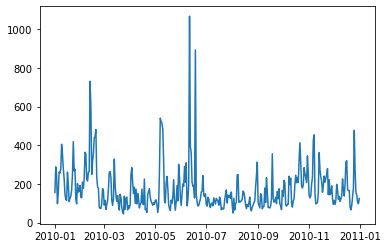

In [ ]:
df_wiper.drop(df_wiper[df_wiper['銷售量']>2000].index, inplace = True)
wiper=df_wiper.groupby(['日期'])['銷售量'].sum().reset_index()
plt.figure(1)
ax1=plt.plot(wiper['日期'],wiper['銷售量'],label='Sales')

# Calculate the trend
data with noise is not really useful, we can simplify the model

In [ ]:
import math
N=30
wiper['MA']=wiper['銷售量'].rolling(window=N).mean().shift(-math.ceil(N/2))
batt['MA']=batt['銷售量'].rolling(window=N).mean().shift(-math.ceil(N/2))

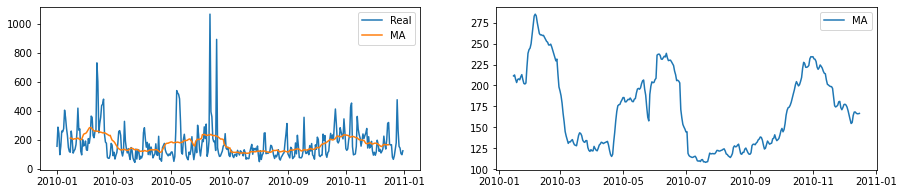

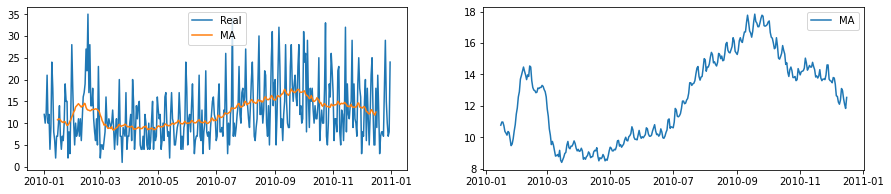

In [ ]:
fig1,ax1=plt.subplots(1,2,figsize=(15, 3))
ax1[0].plot(wiper['日期'],wiper['銷售量'],label='Real')
ax1[0].plot(wiper['日期'],wiper['MA'],label='MA')
ax1[0].legend(loc='best')
ax1[1].plot(wiper['日期'],wiper['MA'],label='MA')
ax1[1].legend(loc='best')


fig2,ax2=plt.subplots(1,2,figsize=(15, 3))
ax2[0].plot(batt['日期'],batt['銷售量'],label='Real')
ax2[0].plot(batt['日期'],batt['MA'],label='MA')
ax2[0].legend(loc='best')
ax2[1].plot(batt['日期'],batt['MA'],label='MA')
ax2[1].legend(loc='best')

# Weather Data

## Rain

In [ ]:
rain2009 = pd.read_excel ('rain_2009.xlsx')
rain2010 = pd.read_excel ('rain_2010.xlsx')
rain2011 = pd.read_excel ('rain_2011.xlsx')
rain2009.head()

Day  Jan  Feb   Mar  Apr  May    Jun   Jul  Aug   Sep   Oct  Nov  Dec
0    1  0.0  0.0   1.0  0.1  0.0    0.0   0.0  0.0   0.0   5.5  2.4  0.0
1    2  0.0  0.0   2.0  0.0  0.0    0.5   9.5  0.0  36.1   0.1  0.0  0.0
2    3  0.1  0.0   1.5  0.0  0.1    0.1   1.5  1.6  23.7   2.0  0.3  0.2
3    4  0.1  1.5   0.1  0.0  1.5  154.5   0.1  6.2   7.5   9.2  0.0  0.0
4    5  3.1  1.8  12.7  3.8  0.0   12.0  12.5  0.4   0.0  97.5  0.0  0.0

In [ ]:
weather=pd.DataFrame({'date':pd.date_range(start='1/10/2009', end='31/12/2011')})
weather['rain']=0
for i in range(weather.shape[0]):
    year=weather['date'][i].year
    month=locals()[f"rain{year}"].columns[weather.date.dt.month[i]]
    day=weather['date'][i].day
    weather.loc[i,'rain']=locals()[f"rain{year}"].loc[day-1,month]

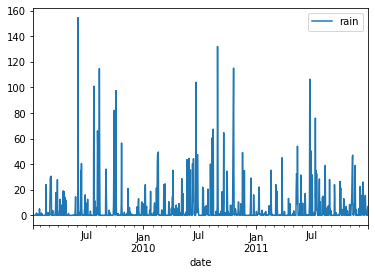

In [ ]:
ax1=weather.plot(x='date',y='rain')

To get the bigger picture, either cumulate or average the rainfall

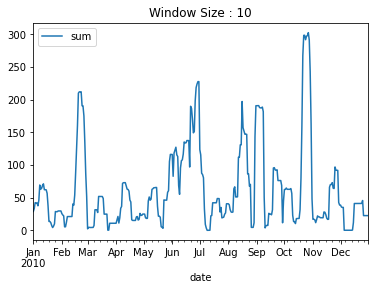

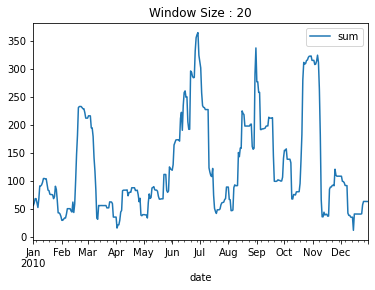

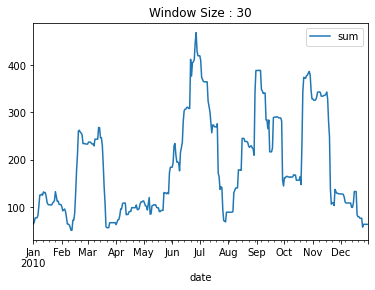

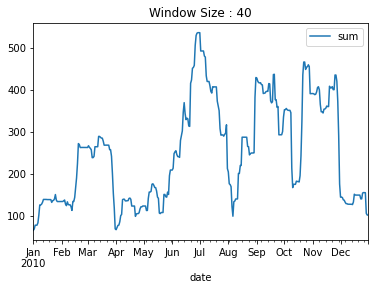

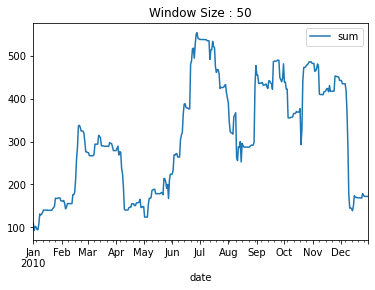

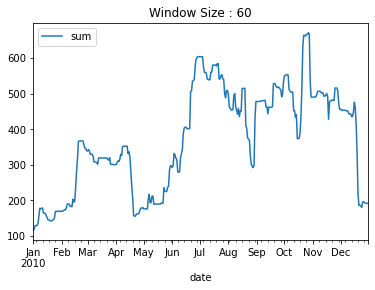

In [ ]:
y2010=(weather['date']>='1-1-2010') & (weather['date']<='31-12-2010') 
y2011=(weather['date']>='1-1-2011') & (weather['date']<='31-12-2011')
for N in range(10,61,10):
    weather['sum']=weather['rain'].rolling(window=N).sum()
    weather[y2010].plot(x='date',y='sum',title="Window Size : {}".format(N))

In [ ]:
N=30
weather['sum']=weather['rain'].rolling(window=N).sum()

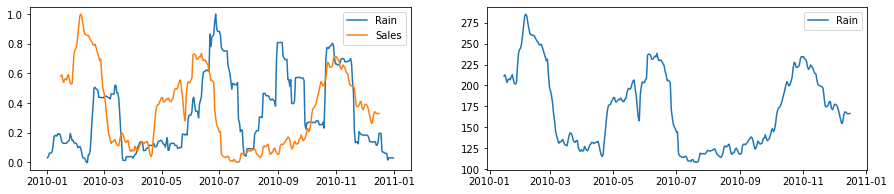

In [ ]:
fig1,ax1=plt.subplots(1,2,figsize=(15, 3))
ub=weather[y2010]['sum'].max()
lb=weather[y2010]['sum'].min()
val=weather[y2010]['sum']
ax1[0].plot(wiper['日期'],(val-lb)/(ub-lb),label='Rain')
ub=wiper['MA'].max()
lb=wiper['MA'].min()
val=wiper['MA']
ax1[0].plot(wiper['日期'],(val-lb)/(ub-lb),label='Sales')
ax1[0].legend(loc='best')
ax1[1].plot(wiper['日期'],val,label='Rain')
ax1[1].legend(loc='best')

In [ ]:
N=60
weather['sum']=weather['rain'].rolling(window=N).sum()

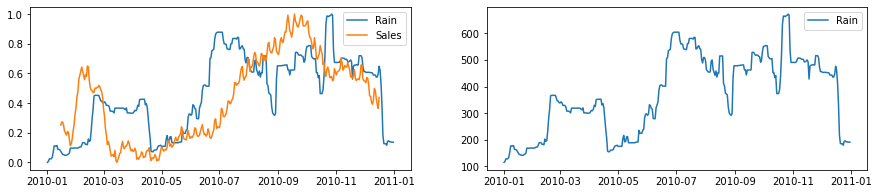

In [ ]:
fig2,ax2=plt.subplots(1,2,figsize=(15, 3))
ub=weather[y2010]['sum'].max()
lb=weather[y2010]['sum'].min()
val=weather[y2010]['sum']
ax2[0].plot(batt['日期'],(val-lb)/(ub-lb),label='Rain')
ub=batt['MA'].max()
lb=batt['MA'].min()
val=batt['MA']
ax2[0].plot(batt['日期'],(val-lb)/(ub-lb),label='Sales')
ax2[0].legend(loc='best')
ax2[1].plot(wiper['日期'],weather[y2010]['sum'],label='Rain')
ax2[1].legend(loc='best')

In [ ]:
weather.drop('sum',axis=1,inplace=True)

## Other Parameter

In [ ]:
weather2=pd.read_excel('weather.xlsx')
weather2.head()

date  average station pressure  average sea level pressure  \
0  20100101                    1018.2                      1019.0   
1  20100102                    1016.4                      1017.2   
2  20100103                    1016.8                      1017.6   
3  20100104                    1015.3                      1016.1   
4  20100105                    1018.9                      1019.7   

   highest station pressure  lowest station pressure  \
0                    1021.7                   1015.7   
1                    1018.9                   1013.8   
2                    1019.3                   1015.3   
3                    1017.0                   1012.9   
4                    1021.6                   1016.7   

   maximum sea level pressure  average temperature  maximum temperature  \
0                      1022.5                 16.5                 19.4   
1                      1019.7                 16.8                 19.6   
2                      1020.1                 15.8                 18.2   
3                      1017.8                 17.5                 22.2   
4                      1022.4                 14.9                 17.8   

   minimum temperature  daily temperature difference  average water pressure  \
0                 13.7                           5.7                    13.3   
1                 14.9                           4.7                    16.1   
2                 14.1                           4.1                    15.3   
3                 13.8                           8.4                    15.8   
4                 13.5                           4.3                    13.9   

   average relative humidity  
0                         71  
1                         84  
2                         85  
3                         79  
4                         82

In [ ]:
from datetime import datetime
dates=[]
for index, row in weather2.iterrows():
    dates.append(datetime.strptime(str(round(row['date'])), '%Y%m%d').strftime('%Y-%m-%d'))
weather2['date']=dates
weather2['date']=pd.to_datetime(weather2['date'])
weather2.head()

date  average station pressure  average sea level pressure  \
0 2010-01-01                    1018.2                      1019.0   
1 2010-01-02                    1016.4                      1017.2   
2 2010-01-03                    1016.8                      1017.6   
3 2010-01-04                    1015.3                      1016.1   
4 2010-01-05                    1018.9                      1019.7   

   highest station pressure  lowest station pressure  \
0                    1021.7                   1015.7   
1                    1018.9                   1013.8   
2                    1019.3                   1015.3   
3                    1017.0                   1012.9   
4                    1021.6                   1016.7   

   maximum sea level pressure  average temperature  maximum temperature  \
0                      1022.5                 16.5                 19.4   
1                      1019.7                 16.8                 19.6   
2                      1020.1                 15.8                 18.2   
3                      1017.8                 17.5                 22.2   
4                      1022.4                 14.9                 17.8   

   minimum temperature  daily temperature difference  average water pressure  \
0                 13.7                           5.7                    13.3   
1                 14.9                           4.7                    16.1   
2                 14.1                           4.1                    15.3   
3                 13.8                           8.4                    15.8   
4                 13.5                           4.3                    13.9   

   average relative humidity  
0                         71  
1                         84  
2                         85  
3                         79  
4                         82

In [ ]:
y22010=(weather2['date']>='1-1-2010') & (weather2['date']<='31-12-2010') 
y22011=(weather2['date']>='1-1-2011') & (weather2['date']<='31-12-2011')

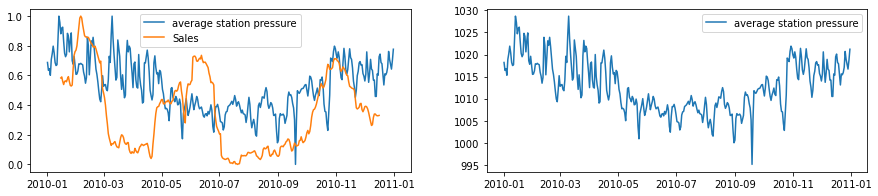

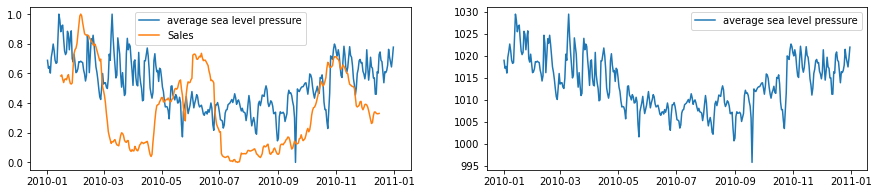

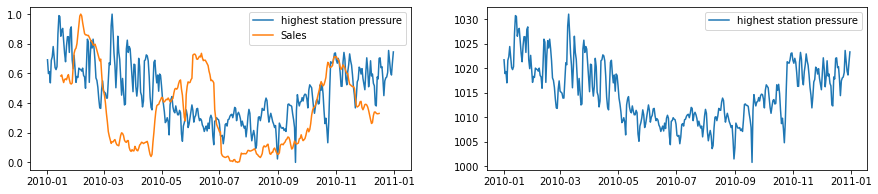

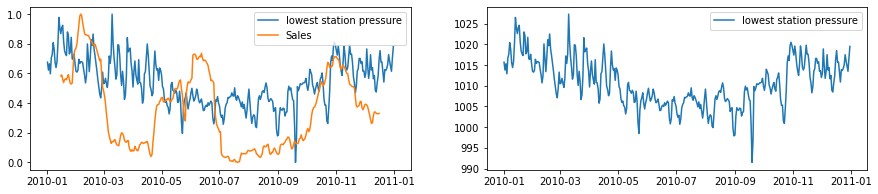

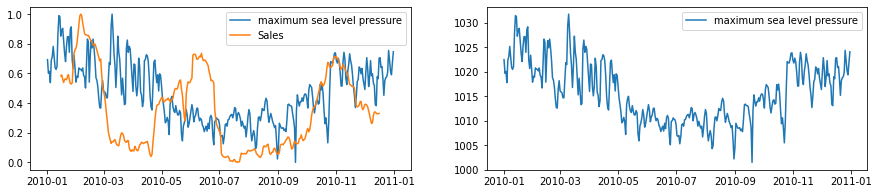

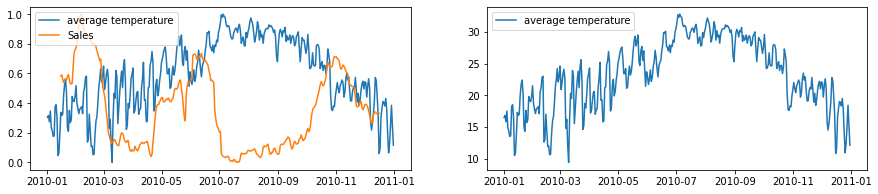

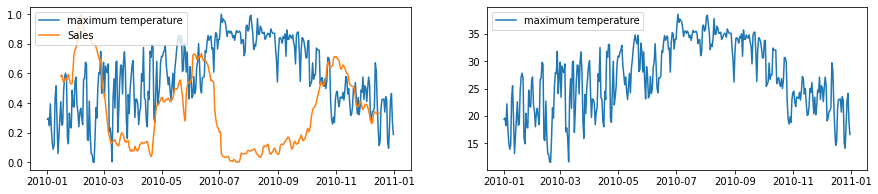

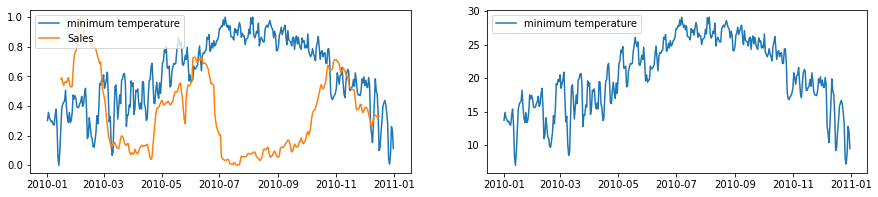

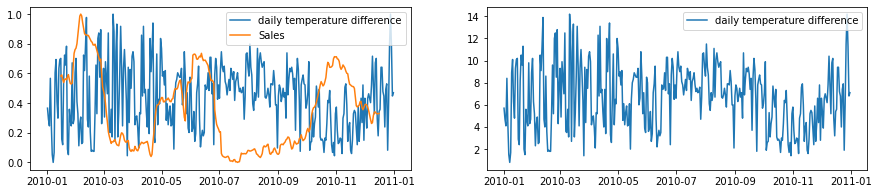

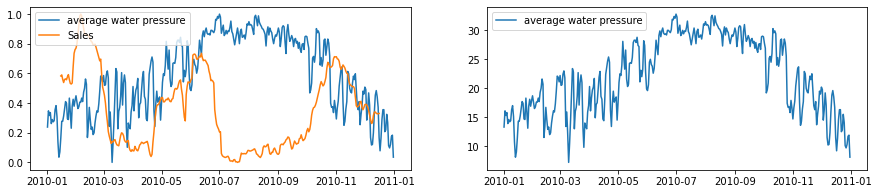

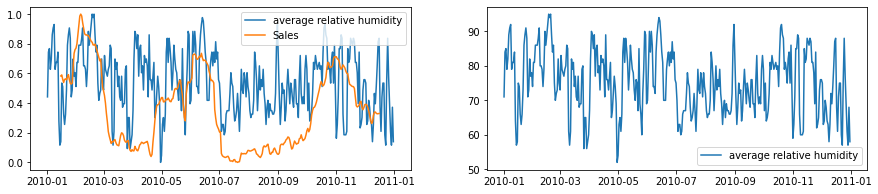

In [ ]:
for col in weather2.columns[1:]:
    fig1,ax1=plt.subplots(1,2,figsize=(15, 3))
    ub=weather2[y22010][col].max()
    lb=weather2[y22010][col].min()
    val=weather2[y22010][col]
    ax1[0].plot(weather2[y22010]['date'],(val-lb)/(ub-lb),label=col)
    ub=wiper['MA'].max()
    lb=wiper['MA'].min()
    val=wiper['MA']
    ax1[0].plot(wiper['日期'],(val-lb)/(ub-lb),label='Sales')
    ax1[0].legend(loc='best')
    ax1[1].plot(weather2[y22010]['date'],weather2[y22010][col],label=col)
    ax1[1].legend(loc='best')

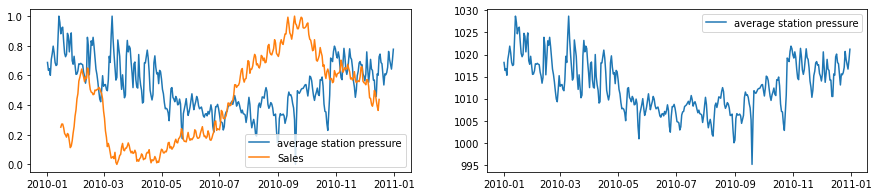

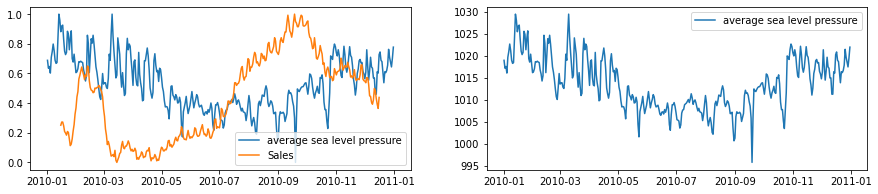

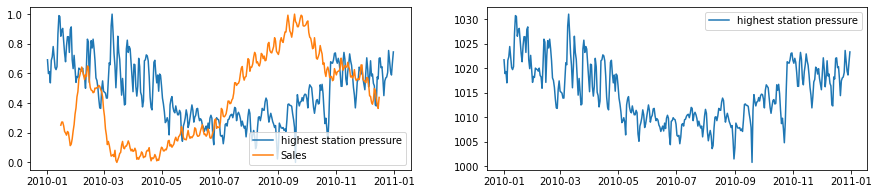

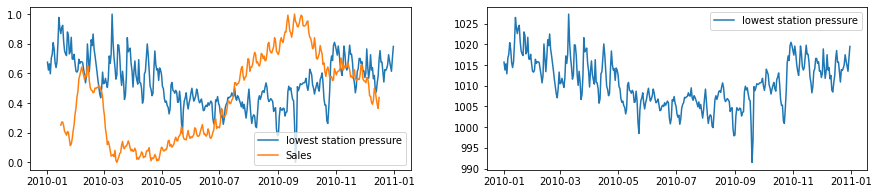

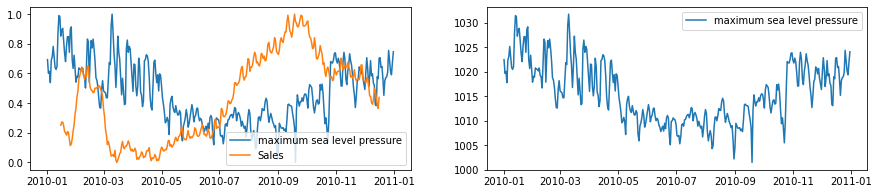

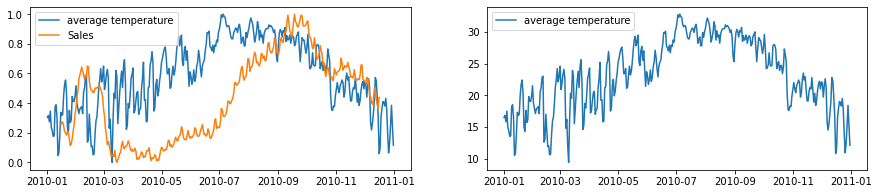

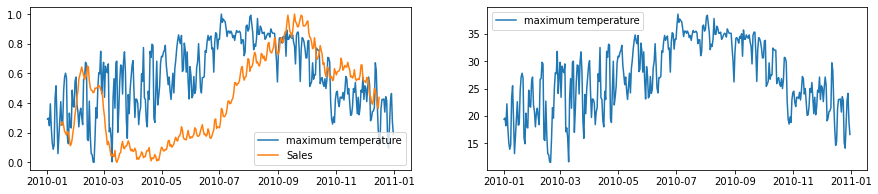

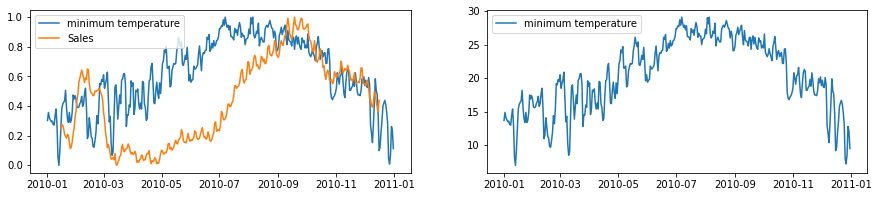

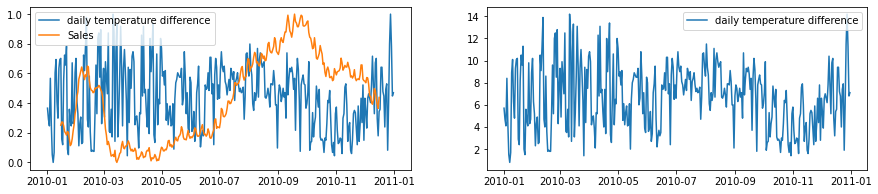

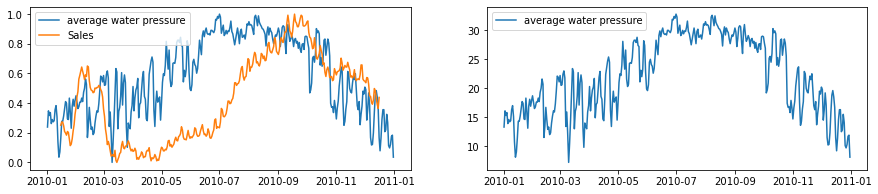

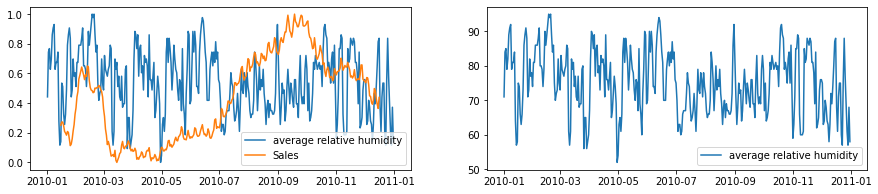

In [ ]:
for col in weather2.columns[1:]:
    fig1,ax1=plt.subplots(1,2,figsize=(15, 3))
    ub=weather2[y22010][col].max()
    lb=weather2[y22010][col].min()
    val=weather2[y22010][col]
    ax1[0].plot(weather2[y22010]['date'],(val-lb)/(ub-lb),label=col)
    ub=batt['MA'].max()
    lb=batt['MA'].min()
    val=batt['MA']
    ax1[0].plot(wiper['日期'],(val-lb)/(ub-lb),label='Sales')
    ax1[0].legend(loc='best')
    ax1[1].plot(weather2[y22010]['date'],weather2[y22010][col],label=col)
    ax1[1].legend(loc='best')

# Feature Engineering

In [ ]:
N=range(10,61,10)
wcols=[]
for i in N:
    col='sum'+str(i)
    wcols.append(col)
    weather[col]=weather['rain'].rolling(window=i).sum()
weather[y2010].head()

date  rain  sum10  sum20  sum30  sum40  sum50  sum60
356 2010-01-01   0.0   28.8   56.4   63.8   65.8  109.4  115.4
357 2010-01-02   4.5   33.3   60.9   68.1   69.1   92.9  119.6
358 2010-01-03   9.0   42.3   68.5   77.1   78.0  101.9  128.6
359 2010-01-04   0.0   41.8   68.5   77.1   77.9  100.6  128.6
360 2010-01-05   0.2   42.0   60.2   77.3   78.1   94.8  128.8

### Combine all data

In [ ]:
data=pd.DataFrame({'date':wiper['日期']})
data['wiper']=wiper['MA']
data['w-1']=wiper['MA'].shift(1)
data['batt']=batt['MA']
data['b-1']=batt['MA'].shift(1)
data=pd.merge(data,weather[y2010])
data=pd.merge(data,weather2[y22010])
data=data.dropna()

### Heat Map

<AxesSubplot:>

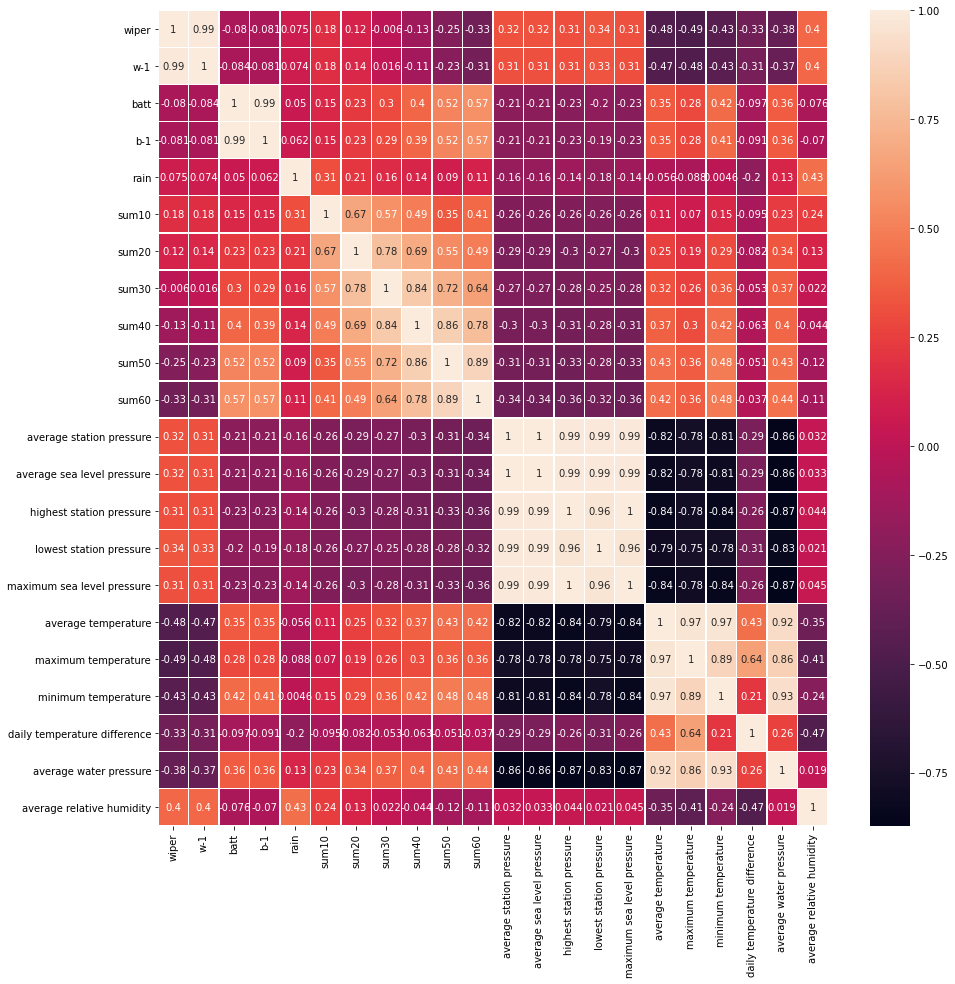

In [ ]:
import seaborn as sn
corr=data.corr()
fig=plt.figure(figsize=(15,15))
sn.heatmap(corr, annot=True, linewidths=.5)

### Preapare list of columns

In [ ]:
import copy
wcols.extend(['average station pressure', 'average sea level pressure',
       'highest station pressure', 'lowest station pressure',
       'maximum sea level pressure', 'average temperature',
       'maximum temperature', 'minimum temperature',
       'daily temperature difference', 'average water pressure',
       'average relative humidity'])
colsw=copy.deepcopy(wcols)
colsw.append('w-1')
colsb=copy.deepcopy(wcols)
colsb.append('b-1')

# Modelling Random Forest

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
np.random.seed(42)
model=RandomForestRegressor(n_estimators=500)

## Model - Weather only

### Wiper Sales

In [ ]:
model.fit(data[wcols],data['wiper'])
pred=model.predict(data[wcols])

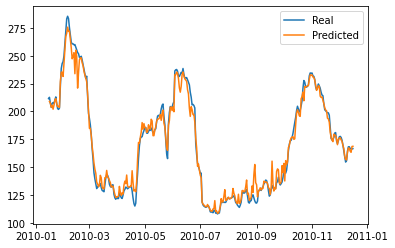

In [ ]:
fig1,ax1=plt.subplots()
ax1.plot(wiper['日期'],wiper['MA'],label='Real')
ax1.plot(data['date'],pred,label='Predicted')
ax1.legend(loc='best')

Importance Ranking

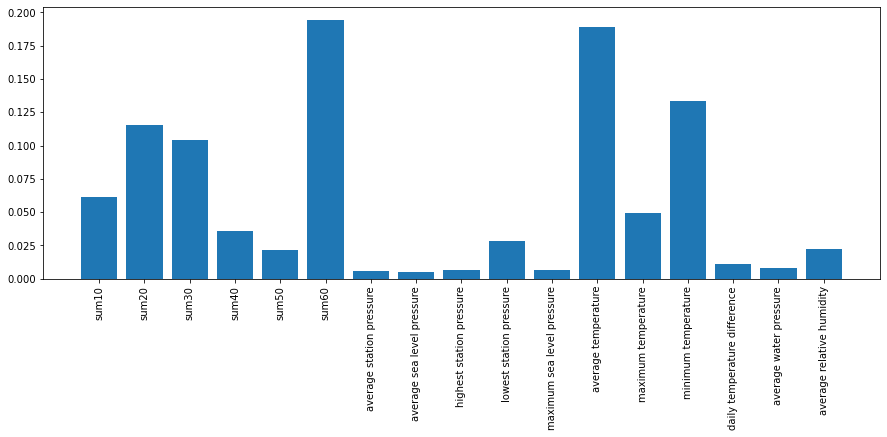

In [ ]:
importance=model.feature_importances_
plt.figure(figsize=(15,5))
plt.bar(wcols, importance)
plt.xticks(rotation=90)
plt.show()

5 Largest Contributor

In [ ]:
idx=np.argsort(importance)[-5:]
feat_w=[]
for i in idx:
    feat_w.append(colsw[i])

In [ ]:
feat_w

['sum30', 'sum20', 'minimum temperature', 'average temperature', 'sum60']

### Battery Sales

In [ ]:
model.fit(data[wcols],data['batt'])
pred=model.predict(data[wcols])

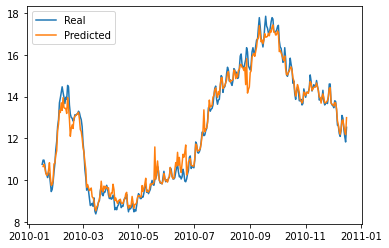

In [ ]:
fig1,ax1=plt.subplots()
ax1.plot(batt['日期'],batt['MA'],label='Real')
ax1.plot(data['date'],pred,label='Predicted')
ax1.legend(loc='best')

Importance Ranking

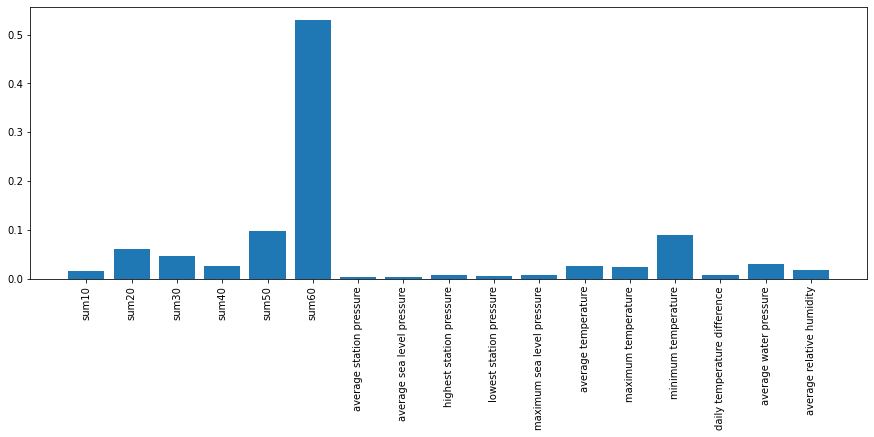

In [ ]:
importance=model.feature_importances_
plt.figure(figsize=(15,5))
plt.bar(wcols, importance)
plt.xticks(rotation=90)
plt.show()

5 Largest Contributor

In [ ]:
idx=np.argsort(importance)[-5:]
feat_b=[]
for i in idx:
    feat_b.append(colsb[i])

In [ ]:
feat_b

['sum30', 'sum20', 'minimum temperature', 'sum50', 'sum60']

## Cross Validation Score

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
date=data['date'].to_numpy()
X1=data[wcols].to_numpy()
X2=data[wcols].to_numpy()
y1=data['wiper'].to_numpy()
y2=data['batt'].to_numpy()

### Wiper Sales

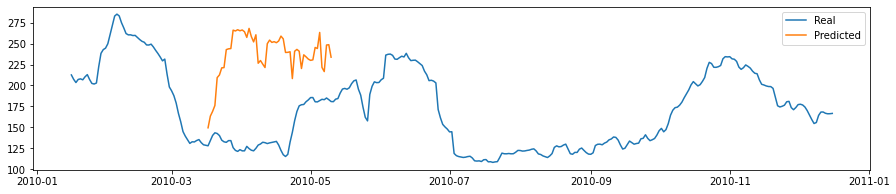

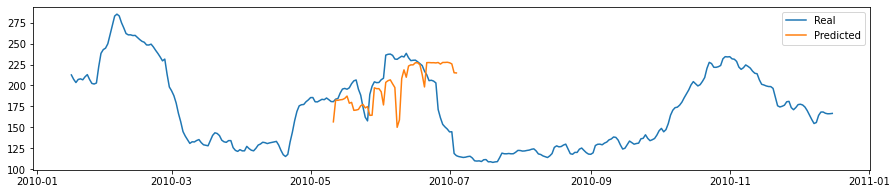

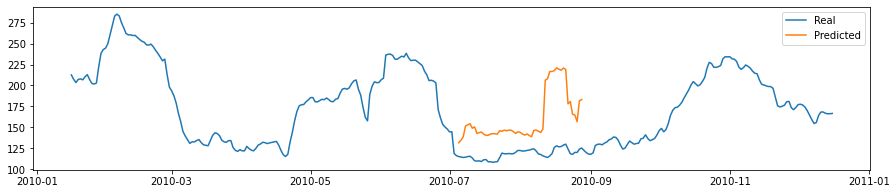

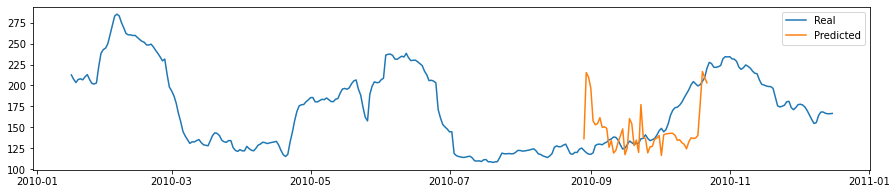

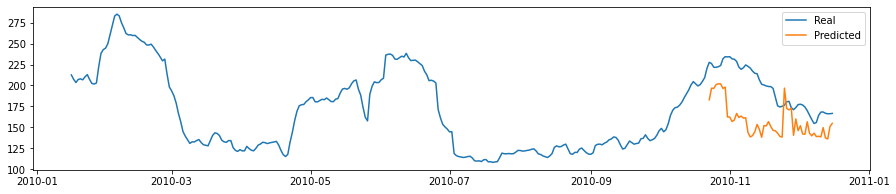

In [ ]:
result=[]
for train,test in tscv.split(X1):
    model.fit(X1[train],y1[train])
    pred=model.predict(X1[test])
    result.append(mean_absolute_error(pred,y1[test]))
    fig1,ax1=plt.subplots(figsize=(15, 3))
    total=np.concatenate((train,test))
    ax1.plot(date,y1,label='Real')
    ax1.plot(date[test],pred,label='Predicted')
    ax1.legend(loc='best')

In [ ]:
print(result)
np.average(result)

[92.29943999999973, 29.756612121212086, 42.99650181818192, 26.677760000000053, 39.1478206060606]


46.17562690909088

### Battery Sales

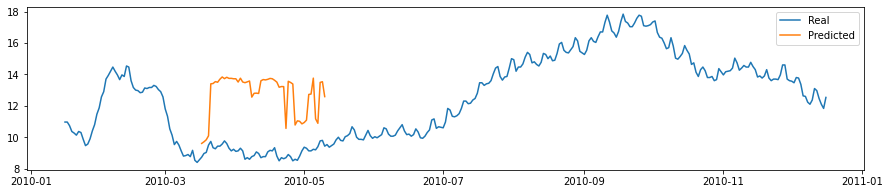

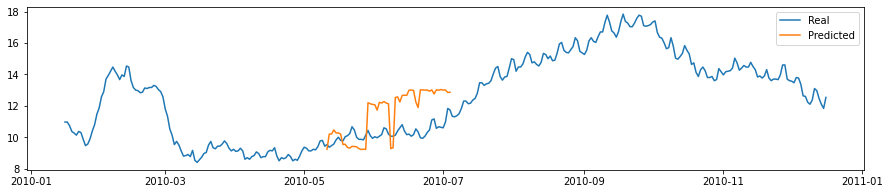

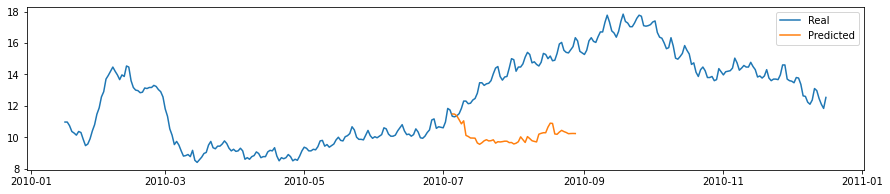

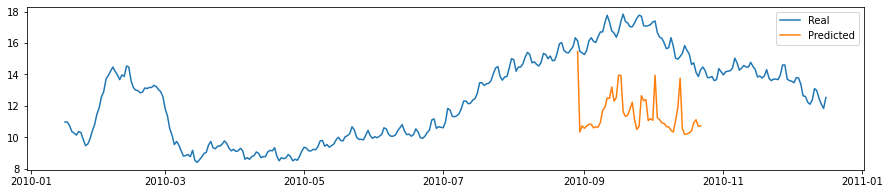

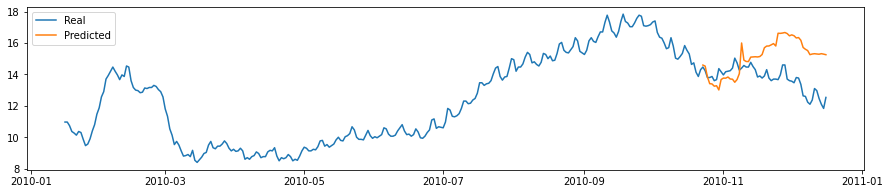

In [ ]:
result=[]
for train,test in tscv.split(X2):
    model.fit(X2[train],y2[train])
    pred=model.predict(X2[test])
    result.append(mean_absolute_error(pred,y2[test]))
    fig1,ax1=plt.subplots(figsize=(15, 3))
    total=np.concatenate((train,test))
    ax1.plot(date,y2,label='Real')
    ax1.plot(date[test],pred,label='Predicted')
    ax1.legend(loc='best')

In [ ]:
print(result)
np.average(result)

[3.67872242424241, 1.6135151515151736, 3.998398787878791, 4.835454545454545, 1.6511030303030305]


3.15543878787879

## Model - Weather + Time Lag

### Wiper Sales

In [ ]:
model.fit(data[colsw],data['wiper'])
pred=model.predict(data[colsw])

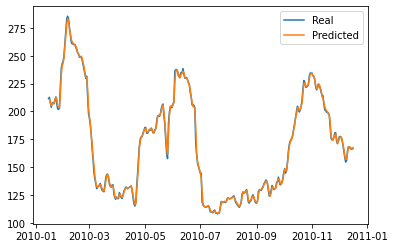

In [ ]:
fig1,ax1=plt.subplots()
ax1.plot(wiper['日期'],wiper['MA'],label='Real')
ax1.plot(data['date'],pred,label='Predicted')
ax1.legend(loc='best')

Importance Ranking

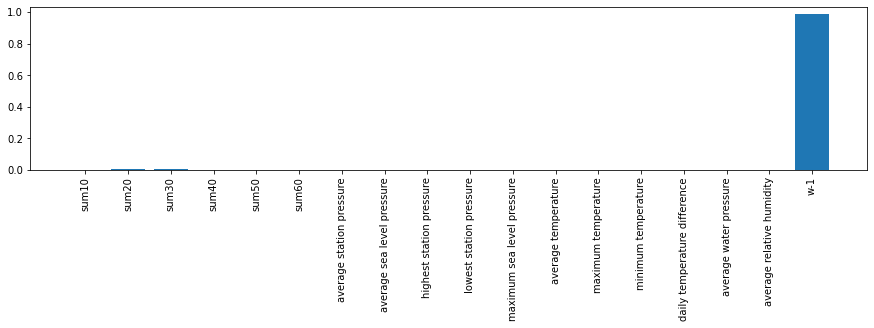

In [ ]:
importance=model.feature_importances_
plt.figure(figsize=(15,3))
plt.bar(colsw[:], importance)
plt.xticks(rotation=90)
plt.show()

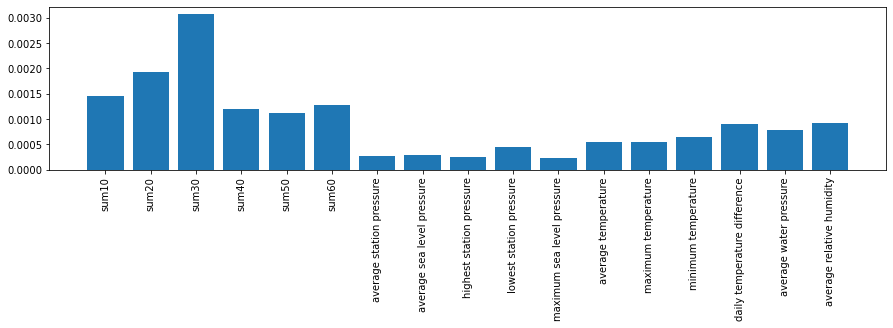

In [ ]:
weatimp=importance[:-1]
plt.figure(figsize=(15,3))
plt.bar(wcols, weatimp)
plt.xticks(rotation=90)
plt.show()

### Battery Sales

In [ ]:
model.fit(data[colsb],data['batt'])
pred=model.predict(data[colsb])

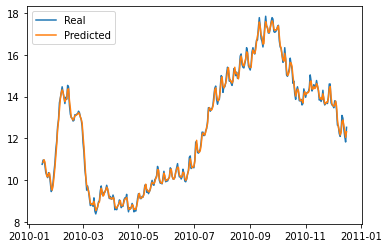

In [ ]:
fig1,ax1=plt.subplots()
ax1.plot(batt['日期'],batt['MA'],label='Real')
ax1.plot(data['date'],pred,label='Predicted')
ax1.legend(loc='best')

Importance Ranking

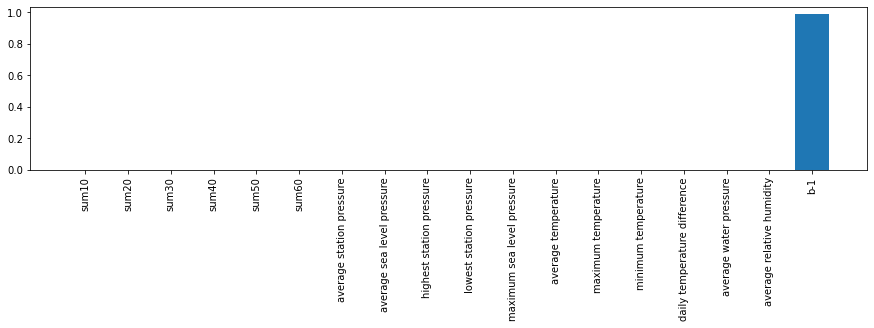

In [ ]:
importance=model.feature_importances_
plt.figure(figsize=(15,3))
plt.bar(colsb[:], importance)
plt.xticks(rotation=90)
plt.show()

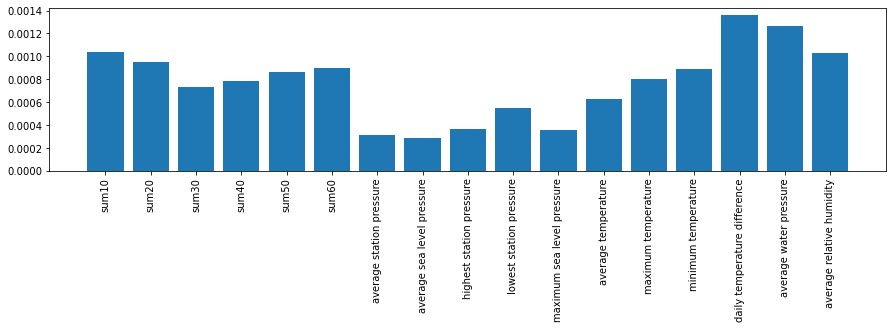

In [ ]:
weatimp=importance[:-1]
plt.figure(figsize=(15,3))
plt.bar(wcols, weatimp)
plt.xticks(rotation=90)
plt.show()

## Cross Validation Score

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)
date=data['date'].to_numpy()
X1=data[colsw].to_numpy()
X2=data[colsb].to_numpy()
y1=data['wiper'].to_numpy()
y2=data['batt'].to_numpy()

In [ ]:
data[colsw].head()

sum10  sum20  sum30  sum40  sum50  sum60  average station pressure  \
15   56.6   94.1  109.3  138.9  140.2  150.8                    1026.0   
16   37.6   83.6  105.7  138.9  139.6  144.8                    1026.2   
17   13.6   82.9  104.7  138.9  139.6  144.7                    1023.0   
18   13.5   76.4  104.6  138.9  139.6  142.3                    1020.3   
19   11.6   75.8  104.6  138.8  139.6  142.2                    1019.5   

    average sea level pressure  highest station pressure  \
15                      1026.8                    1027.7   
16                      1027.0                    1028.1   
17                      1023.8                    1025.5   
18                      1021.1                    1023.0   
19                      1020.3                    1021.3   

    lowest station pressure  maximum sea level pressure  average temperature  \
15                   1024.1                      1028.5                 16.8   
16                   1024.6                      1028.9                 17.0   
17                   1020.7                      1026.3                 20.0   
18                   1018.4                      1023.8                 21.7   
19                   1017.7                      1022.1                 22.4   

    maximum temperature  minimum temperature  daily temperature difference  \
15                 18.3                 15.4                           2.9   
16                 18.5                 16.1                           2.4   
17                 24.6                 16.4                           8.2   
18                 27.1                 16.6                          10.5   
19                 27.8                 18.2                           9.6   

    average water pressure  average relative humidity         w-1  
15                    14.3                         75  211.433333  
16                    14.3                         74  212.633333  
17                    15.2                         66  207.400000  
18                    16.4                         63  203.533333  
19                    17.7                         66  207.233333

### Wiper Sales

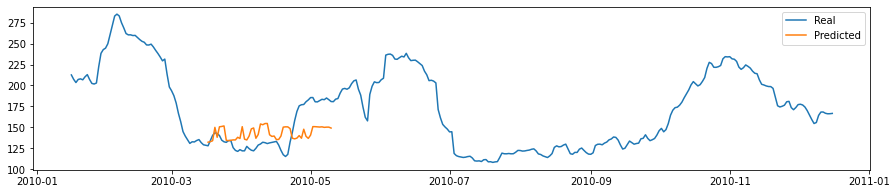

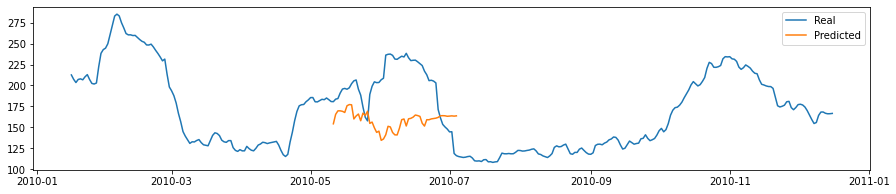

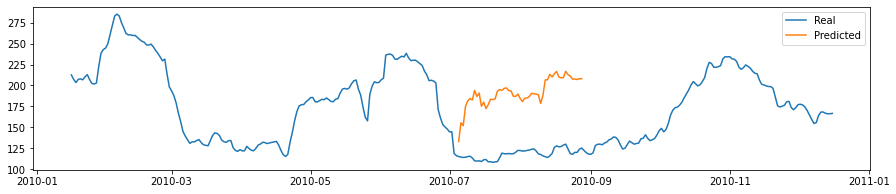

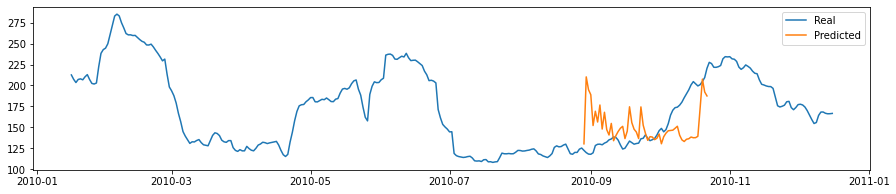

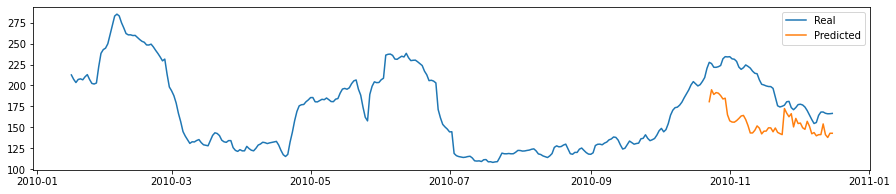

In [ ]:
result=[]
for train,test in tscv.split(X1):
    model.fit(X1[train],y1[train])
    preds=[]
    for idx in test:
        pred=model.predict([X1[idx]])
        preds.append(pred)
        if idx+1 < X1.shape[0]:
            X1[idx+1][X1.shape[1]-1]=pred
    result.append(mean_absolute_error(preds,y1[test]))
    fig1,ax1=plt.subplots(figsize=(15, 3))
    total=np.concatenate((train,test))
    ax1.plot(date,y1,label='Real')
    ax1.plot(date[test],preds,label='Predicted')
    ax1.legend(loc='best')

In [ ]:
print(result)
np.average(result)

[20.289608484848497, 46.97672606060604, 73.86376484848513, 26.65727272727283, 39.83550909090907]


41.52457624242432

### Battery Sales

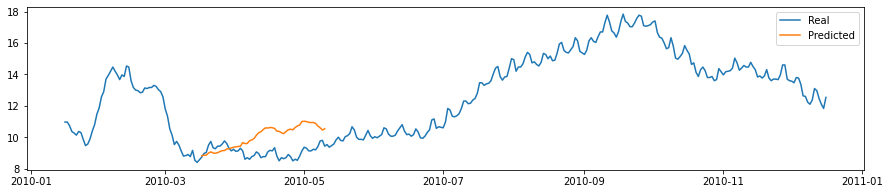

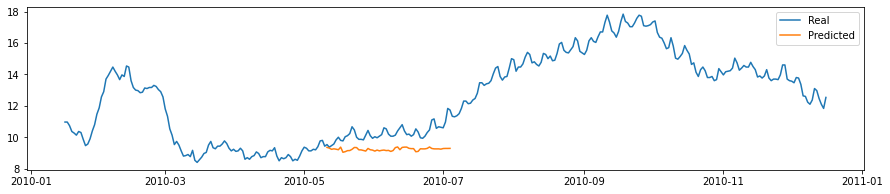

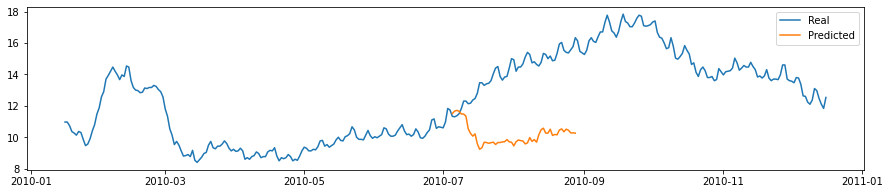

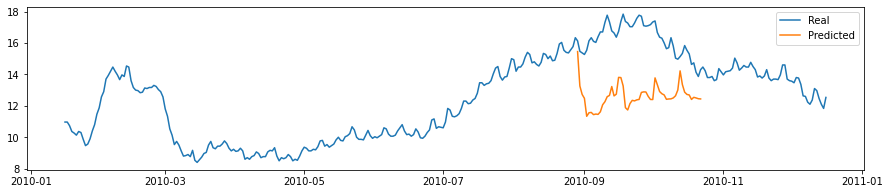

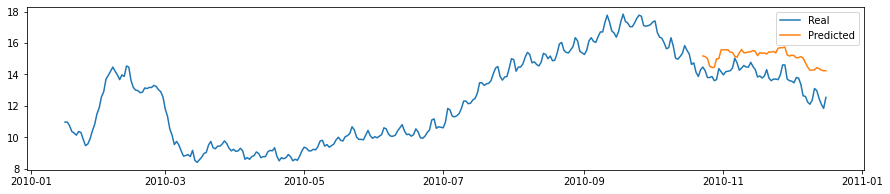

In [ ]:
result=[]    
for train,test in tscv.split(X2):
    model.fit(X2[train],y2[train])
    preds=[]
    for idx in test:
        pred=model.predict([X2[idx]])
        preds.append(pred)
        if idx+1 < X2.shape[0]:
            X2[idx+1][X2.shape[1]-1]=pred
    result.append(mean_absolute_error(preds,y2[test]))
    fig1,ax1=plt.subplots(figsize=(15, 3))
    total=np.concatenate((train,test))
    ax1.plot(date,y2,label='Real')
    ax1.plot(date[test],preds,label='Predicted')
    ax1.legend(loc='best')

In [ ]:
print(result)
np.average(result)

[1.0956157575757546, 1.0276836363636361, 3.985894545454538, 3.6776533333333203, 1.3699684848485092]


2.231363151515152

## Model - 5 Most Important Feature

In [ ]:
date=data['date'].to_numpy()
X1=data[feat_w].to_numpy()
X2=data[feat_b].to_numpy()
y1=data['wiper'].to_numpy()
y2=data['batt'].to_numpy()

In [ ]:
data[feat_w].head()

sum30  sum20  minimum temperature  average temperature  sum60
15  109.3   94.1                 15.4                 16.8  150.8
16  105.7   83.6                 16.1                 17.0  144.8
17  104.7   82.9                 16.4                 20.0  144.7
18  104.6   76.4                 16.6                 21.7  142.3
19  104.6   75.8                 18.2                 22.4  142.2

In [ ]:
data[feat_b].head()

sum30  sum20  minimum temperature  sum50  sum60
15  109.3   94.1                 15.4  140.2  150.8
16  105.7   83.6                 16.1  139.6  144.8
17  104.7   82.9                 16.4  139.6  144.7
18  104.6   76.4                 16.6  139.6  142.3
19  104.6   75.8                 18.2  139.6  142.2

### Wiper Sales

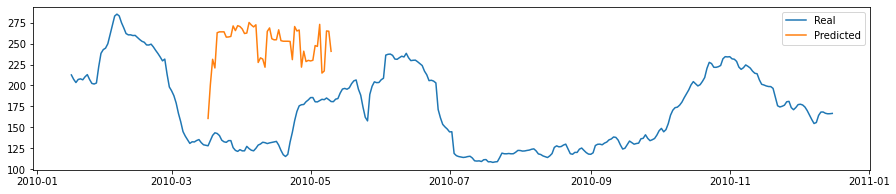

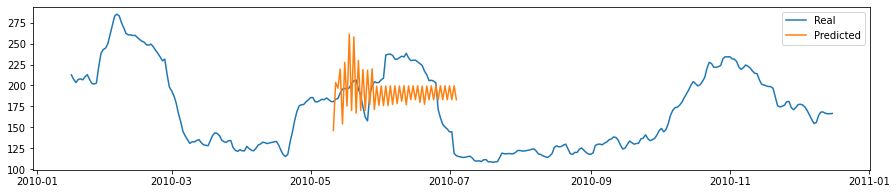

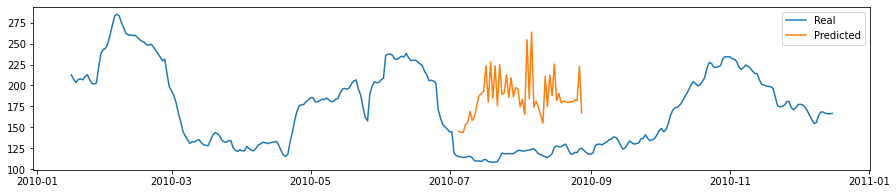

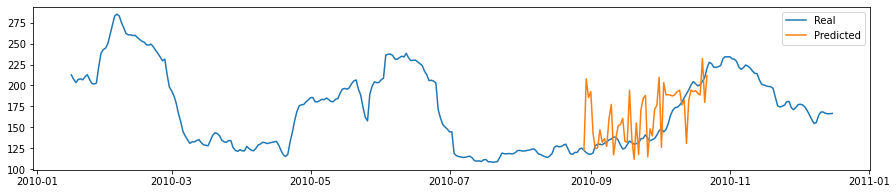

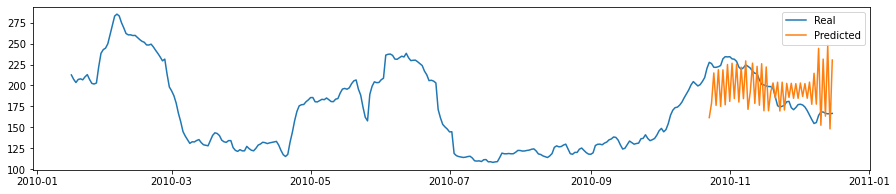

In [ ]:
result=[]
for train,test in tscv.split(X1):
    model.fit(X1[train],y1[train])
    preds=[]
    for idx in test:
        pred=model.predict([X1[idx]])
        preds.append(pred)
        if idx+1 < X1.shape[0]:
            X1[idx+1][4]=pred
    result.append(mean_absolute_error(preds,y1[test]))
    fig1,ax1=plt.subplots(figsize=(15, 3))
    total=np.concatenate((train,test))
    ax1.plot(date,y1,label='Real')
    ax1.plot(date[test],preds,label='Predicted')
    ax1.legend(loc='best')

In [ ]:
print(result)
np.average(result)

[105.04430424242396, 34.849847272727416, 69.19909454545451, 24.374424242424258, 27.242813333333032]


52.14209672727263

### Battery Sales

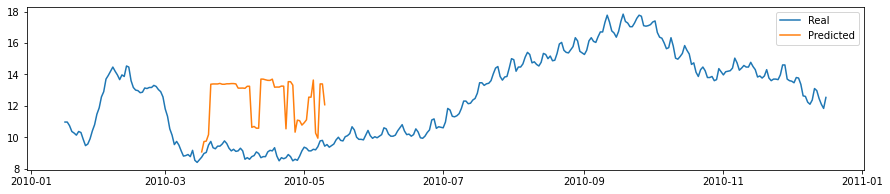

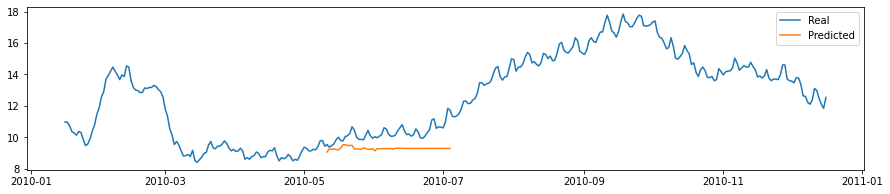

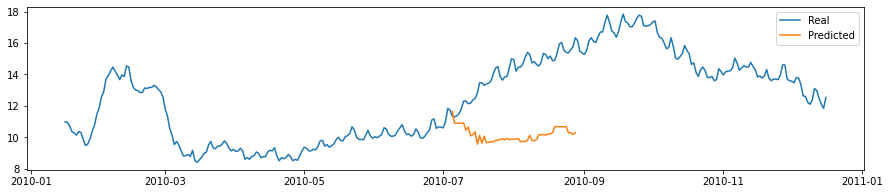

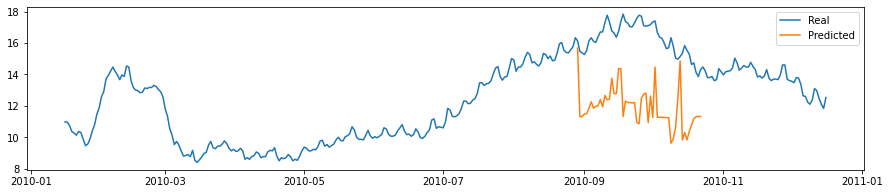

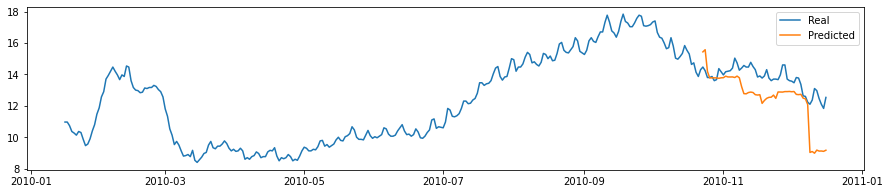

In [ ]:
result=[]    
for train,test in tscv.split(X2):
    model.fit(X2[train],y2[train])
    preds=[]
    for idx in test:
        pred=model.predict([X2[idx]])
        preds.append(pred)
        if idx+1 < X2.shape[0]:
            X2[idx+1][4]=pred
    result.append(mean_absolute_error(preds,y2[test]))
    fig1,ax1=plt.subplots(figsize=(15, 3))
    total=np.concatenate((train,test))
    ax1.plot(date,y2,label='Real')
    ax1.plot(date[test],preds,label='Predicted')
    ax1.legend(loc='best')

In [ ]:
print(result)
np.average(result)

[3.3354509090908793, 0.9753224242424179, 3.9459890909090825, 4.405146666666659, 1.265723636363597]


2.7855265454545273

# Predicting 2011 sales

In [ ]:
df3 = pd.read_excel ('sales_2011.xlsx')
df3.head()

區域          日期          時間  \
0  北區                                            ...  2011/04/05  15:44:17:8   
1  北區                                            ...  2011/10/10  17:12:16:4   
2  北區                                            ...  2011/02/03  10:18:17:4   
3  北區                                            ...  2011/03/23  17:47:32:6   
4  北區                                            ...  2011/11/11  21:44:59:4   

                                                商品類別    ID  銷售量  
0  雨刷                                            ...  3204    1  
1  雨刷                                            ...  3204    1  
2  雨刷                                            ...  3212    1  
3  雨刷                                            ...  3212    1  
4  雨刷                                            ...  3212    1

## Removing unnecesarry space in data

In [ ]:
df3['區域']=df3['區域'].str.strip()
df3['商品類別']=df3['商品類別'].str.strip()
df3.head()

區域          日期          時間 商品類別    ID  銷售量
0  北區  2011/04/05  15:44:17:8   雨刷  3204    1
1  北區  2011/10/10  17:12:16:4   雨刷  3204    1
2  北區  2011/02/03  10:18:17:4   雨刷  3212    1
3  北區  2011/03/23  17:47:32:6   雨刷  3212    1
4  北區  2011/11/11  21:44:59:4   雨刷  3212    1

## Separating wiper and battery
focus on 北歐

In [ ]:
df_wiper2=df3[df3['商品類別']=='雨刷']
df_wiper2

區域          日期          時間 商品類別      ID  銷售量
0      北區  2011/04/05  15:44:17:8   雨刷    3204    1
1      北區  2011/10/10  17:12:16:4   雨刷    3204    1
2      北區  2011/02/03  10:18:17:4   雨刷    3212    1
3      北區  2011/03/23  17:47:32:6   雨刷    3212    1
4      北區  2011/11/11  21:44:59:4   雨刷    3212    1
...    ..         ...         ...  ...     ...  ...
59679  北區  2011/11/19  11:48:20:7   雨刷  289177    1
59680  北區  2011/10/04  22:18:59:0   雨刷  289725    1
59681  北區  2011/11/12  11:52:27:2   雨刷  289725    1
59682  北區  2011/11/29  15:36:28:7   雨刷  289725    2
59685  北區  2011/12/24  12:21:03:4   雨刷  293190    1

[55286 rows x 6 columns]

In [ ]:
df_batt2=df3[df3['商品類別']=='電瓶']

## Group data by days and count

In [ ]:
wiper2=df_wiper2.groupby(['日期'])['銷售量'].sum().reset_index()
wiper2['日期']=pd.to_datetime(wiper2['日期'])
wiper2

日期  銷售量
0   2011-01-01  175
1   2011-01-02  176
2   2011-01-03  284
3   2011-01-04  186
4   2011-01-05  199
..         ...  ...
360 2011-12-27  257
361 2011-12-28  220
362 2011-12-29  247
363 2011-12-30  438
364 2011-12-31  419

[365 rows x 2 columns]

In [ ]:
batt2=df_batt2.groupby(['日期'])['銷售量'].sum().reset_index()
batt2['日期']=pd.to_datetime(batt2['日期'])
batt2

日期  銷售量
0   2011-01-01   12
1   2011-01-02   19
2   2011-01-03    7
3   2011-01-04    6
4   2011-01-05   11
..         ...  ...
360 2011-12-27   10
361 2011-12-28    8
362 2011-12-29   13
363 2011-12-30   15
364 2011-12-31   20

[365 rows x 2 columns]

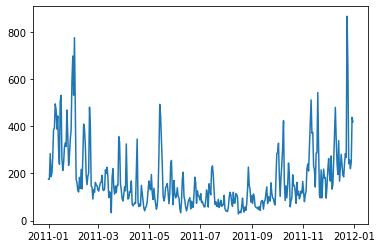

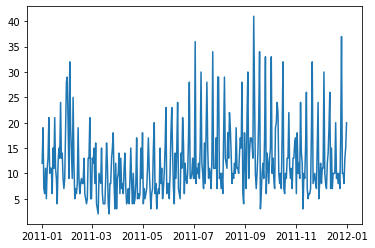

In [ ]:
plt.figure(1)
ax1=plt.plot(wiper2['日期'],wiper2['銷售量'],label='Sales')
plt.figure(2)
ax2=plt.plot(batt2['日期'],batt2['銷售量'],label='Sales')

## Combine data

In [ ]:
wiper_full=wiper.append(wiper2)
batt_full=batt.append(batt2)
sy2010=(wiper_full['日期']>='1-1-2010') & (wiper_full['日期']<='31-12-2010') 
sy2011=(wiper_full['日期']>='1-1-2011') & (wiper_full['日期']<='31-12-2011')

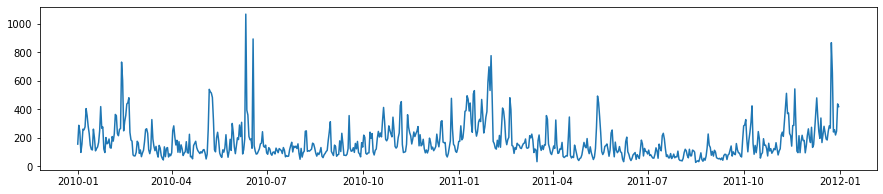

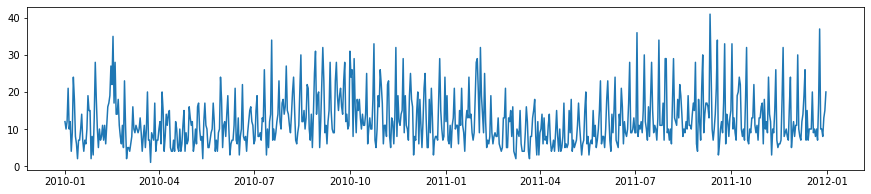

In [ ]:
plt.figure(figsize=(15,3))
ax1=plt.plot(wiper_full['日期'],wiper_full['銷售量'],label='Sales')
plt.figure(figsize=(15,3))
ax2=plt.plot(batt_full['日期'],batt_full['銷售量'],label='Sales')

# Calculate the trend
data with noise is not really useful, we can simplify the model

In [ ]:
N=30
wiper_full['MA']=wiper_full['銷售量'].rolling(window=N).mean().shift(-math.ceil(N/2))
batt_full['MA']=batt_full['銷售量'].rolling(window=N).mean().shift(-math.ceil(N/2))

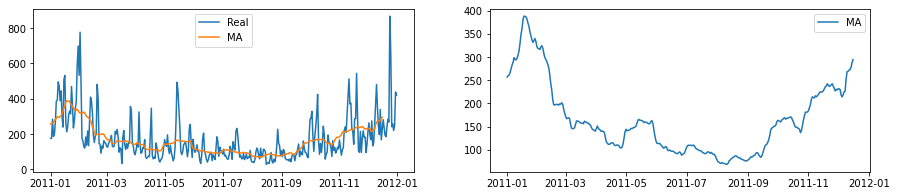

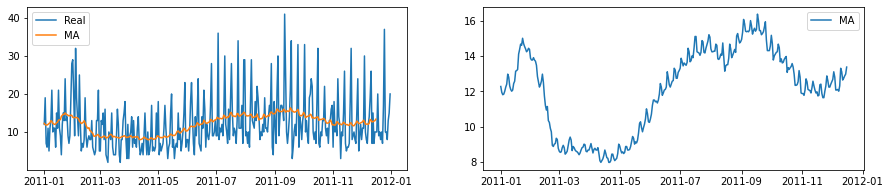

In [ ]:
fig1,ax1=plt.subplots(1,2,figsize=(15, 3))
ax1[0].plot(wiper_full[sy2011]['日期'],wiper_full[sy2011]['銷售量'],label='Real')
ax1[0].plot(wiper_full[sy2011]['日期'],wiper_full[sy2011]['MA'],label='MA')
ax1[0].legend(loc='best')
ax1[1].plot(wiper_full[sy2011]['日期'],wiper_full[sy2011]['MA'],label='MA')
ax1[1].legend(loc='best')


fig2,ax2=plt.subplots(1,2,figsize=(15, 3))
ax2[0].plot(batt_full[sy2011]['日期'],batt_full[sy2011]['銷售量'],label='Real')
ax2[0].plot(batt_full[sy2011]['日期'],batt_full[sy2011]['MA'],label='MA')
ax2[0].legend(loc='best')
ax2[1].plot(batt_full[sy2011]['日期'],batt_full[sy2011]['MA'],label='MA')
ax2[1].legend(loc='best')

## Compare to Weather

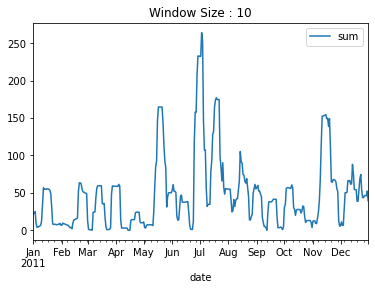

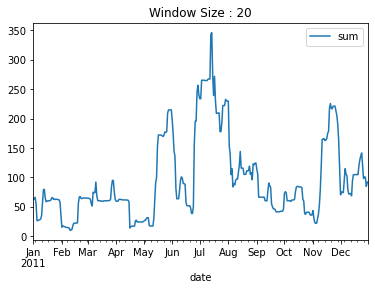

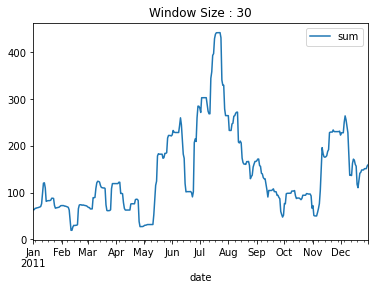

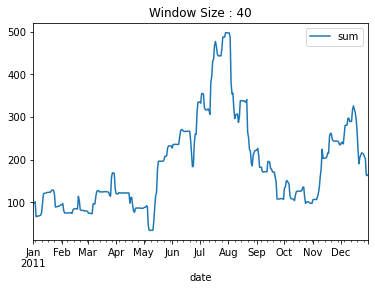

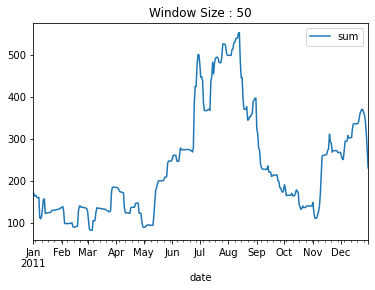

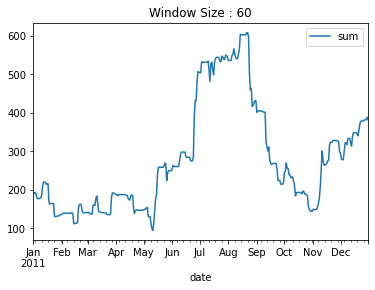

In [ ]:
for N in range(10,61,10):
    weather['sum']=weather['rain'].rolling(window=N).sum()
    weather[y2011].plot(x='date',y='sum',title="Window Size : {}".format(N))

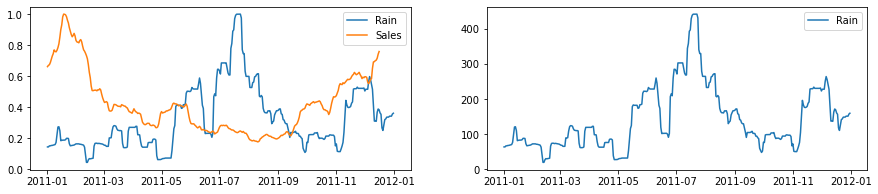

In [ ]:
N=30
weather['sum']=weather['rain'].rolling(window=N).sum()

fig1,ax1=plt.subplots(1,2,figsize=(15, 3))
ax1[0].plot(wiper_full[sy2011]['日期'],weather[y2011]['sum']/weather[y2011]['sum'].max(),label='Rain')
ax1[0].plot(wiper_full[sy2011]['日期'],wiper_full[sy2011]['MA']/wiper_full[sy2011]['MA'].max(),label='Sales')
ax1[0].legend(loc='best')
ax1[1].plot(wiper_full[sy2011]['日期'],weather[y2011]['sum'],label='Rain')
ax1[1].legend(loc='best')

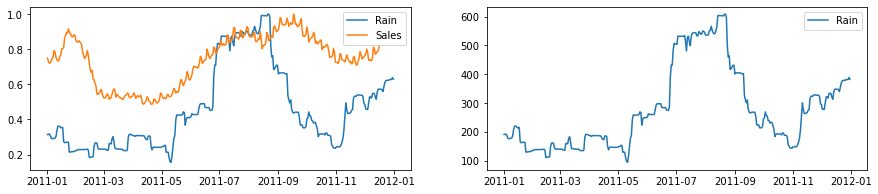

In [ ]:
N=60
weather['sum']=weather['rain'].rolling(window=N).sum()

fig2,ax2=plt.subplots(1,2,figsize=(15, 3))
ax2[0].plot(batt_full[sy2011]['日期'],weather[y2011]['sum']/weather[y2011]['sum'].max(),label='Rain')
ax2[0].plot(batt_full[sy2011]['日期'],batt_full[sy2011]['MA']/batt_full[sy2011]['MA'].max(),label='Sales')
ax2[0].legend(loc='best')
ax2[1].plot(batt_full[sy2011]['日期'],weather[y2011]['sum'],label='Rain')
ax2[1].legend(loc='best')

weather.drop('sum',axis=1,inplace=True)

# Predicting 2011

In [ ]:
alldata1=(weather['date']>='1-1-2010') & (weather['date']<='31-12-2011') 
alldata2=(weather2['date']>='1-1-2010') & (weather2['date']<='31-12-2011')

data=pd.DataFrame({'date':wiper_full['日期']})
data['wiper']=wiper_full['MA']
data['batt']=batt_full['MA']
data=pd.merge(data,weather[alldata1])
data=pd.merge(data,weather2[alldata2])
data=data.dropna()

y2010=(data['date']>='1-1-2010') & (data['date']<='31-12-2010') 
y2011=(data['date']>='1-1-2011') & (data['date']<='31-12-2011') 
data

date       wiper       batt  rain  sum10  sum20  sum30  sum40  \
14  2010-01-15  211.433333  10.766667   0.0   61.9  103.9  122.1  139.2   
15  2010-01-16  212.633333  10.966667   0.2   56.6   94.1  109.3  138.9   
16  2010-01-17  207.400000  10.966667   0.0   37.6   83.6  105.7  138.9   
17  2010-01-18  203.533333  10.733333   0.0   13.6   82.9  104.7  138.9   
18  2010-01-19  207.233333  10.366667   0.0   13.5   76.4  104.6  138.9   
..         ...         ...        ...   ...    ...    ...    ...    ...   
710 2011-12-12  271.666667  12.633333   0.5   61.6   72.8  137.1  289.6   
711 2011-12-13  272.933333  12.733333   0.5   62.1   68.8  136.6  290.1   
712 2011-12-14  278.000000  12.866667  26.0   88.1   94.8  162.6  316.1   
713 2011-12-15  287.800000  12.966667  10.0   75.6  104.8  171.6  326.1   
714 2011-12-16  294.533333  13.366667   0.0   54.5  104.8  169.4  318.6   

     sum50  sum60  ...  average sea level pressure  highest station pressure  \
14   140.0  156.7  ...                      1025.5                    1026.5   
15   140.2  150.8  ...                      1026.8                    1027.7   
16   139.6  144.8  ...                      1027.0                    1028.1   
17   139.6  144.7  ...                      1023.8                    1025.5   
18   139.6  142.3  ...                      1021.1                    1023.0   
..     ...    ...  ...                         ...                       ...   
710  302.3  320.8  ...                      1020.6                    1021.2   
711  302.8  313.3  ...                      1019.7                    1021.3   
712  325.3  338.3  ...                      1019.3                    1020.2   
713  335.2  348.3  ...                      1021.4                    1022.8   
714  335.2  348.3  ...                      1026.3                    1027.8   

     lowest station pressure  maximum sea level pressure  average temperature  \
14                    1022.6                      1027.3                 17.3   
15                    1024.1                      1028.5                 16.8   
16                    1024.6                      1028.9                 17.0   
17                    1020.7                      1026.3                 20.0   
18                    1018.4                      1023.8                 21.7   
..                       ...                         ...                  ...   
710                   1018.4                      1022.0                 17.3   
711                   1017.1                      1022.1                 18.1   
712                   1016.5                      1021.0                 19.1   
713                   1018.9                      1023.6                 17.6   
714                   1022.7                      1028.6                 14.8   

     maximum temperature  minimum temperature  daily temperature difference  \
14                  22.6                 12.4                          10.2   
15                  18.3                 15.4                           2.9   
16                  18.5                 16.1                           2.4   
17                  24.6                 16.4                           8.2   
18                  27.1                 16.6                          10.5   
..                   ...                  ...                           ...   
710                 18.2                 16.3                           1.9   
711                 18.9                 17.2                           1.7   
712                 20.2                 18.5                           1.7   
713                 18.7                 16.9                           1.8   
714                 16.9                 13.3                           3.6   

     average water pressure  average relative humidity  
14                     11.4                         58  
15                     14.3                         75  
16                     14.3                         74 

## Weather Only

In [ ]:
date=data['date'].to_numpy()
X1=data[wcols].to_numpy()
X2=data[wcols].to_numpy()
y1=data['wiper'].to_numpy()
y2=data['batt'].to_numpy()

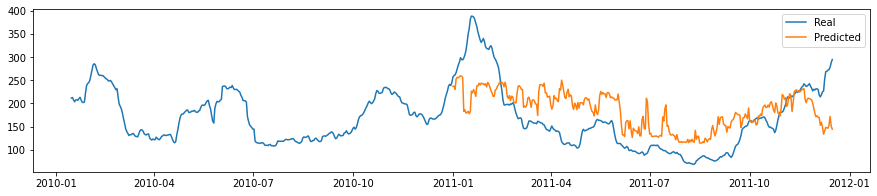

In [ ]:
model.fit(X1[y2010],y1[y2010])
pred=model.predict(X1[y2011])
fig1,ax1=plt.subplots(figsize=(15, 3))
total=np.concatenate((train,test))
ax1.plot(date,y1,label='Real')
ax1.plot(date[y2011],pred,label='Predicted')
ax1.legend(loc='best')

In [ ]:
err=mean_absolute_error(pred,y1[y2011])
print(err)
np.average(err)

54.74216647619047


54.74216647619047

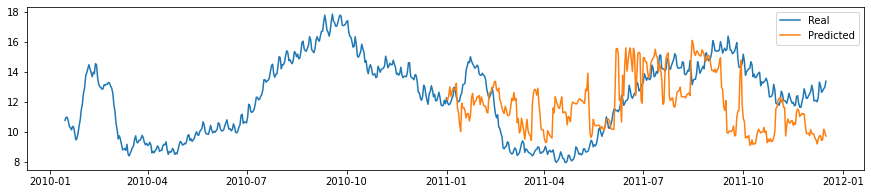

In [ ]:
model.fit(X2[y2010],y2[y2010])
pred=model.predict(X2[y2011])
fig1,ax1=plt.subplots(figsize=(15, 3))
total=np.concatenate((train,test))
ax1.plot(date,y2,label='Real')
ax1.plot(date[y2011],pred,label='Predicted')
ax1.legend(loc='best')

In [ ]:
err=mean_absolute_error(pred,y2[y2011])
print(err)
np.average(err)

2.0967539047619033


2.0967539047619033

## 5 Most Important Feature

In [ ]:
date=data['date'].to_numpy()
X1=data[feat_w].to_numpy()
X2=data[feat_b].to_numpy()
y1=data['wiper'].to_numpy()
y2=data['batt'].to_numpy()

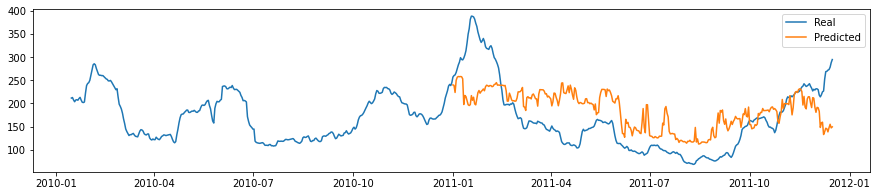

In [ ]:
model.fit(X1[y2010],y1[y2010])
pred=model.predict(X1[y2011])
fig1,ax1=plt.subplots(figsize=(15, 3))
total=np.concatenate((train,test))
ax1.plot(date,y1,label='Real')
ax1.plot(date[y2011],pred,label='Predicted')
ax1.legend(loc='best')

In [ ]:
err=mean_absolute_error(pred,y1[y2011])
print(err)
np.average(err)

55.408579619047586


55.408579619047586

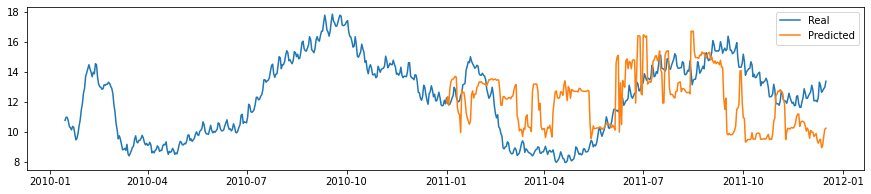

In [ ]:
model.fit(X2[y2010],y2[y2010])
pred=model.predict(X2[y2011])
fig1,ax1=plt.subplots(figsize=(15, 3))
total=np.concatenate((train,test))
ax1.plot(date,y2,label='Real')
ax1.plot(date[y2011],pred,label='Predicted')
ax1.legend(loc='best')

In [ ]:
err=mean_absolute_error(pred,y2[y2011])
print(err)
np.average(err)

2.1990017142857043


2.1990017142857043